# Linear Regression

https://www.youtube.com/watch?v=VmbA0pi2cRQ

I already created notes for linear regression, so I added any extras to these notes from the coursera course. (C)


## What is it?
- (C) A supervised learning model using data that has corresponding 'correct' answers.
- Any supervised model that predicts a number is addressing a regression problem.
- Here we have infinitely many possible outputs (continuous)

## What is it for?

> **Regression:** Find the best function to visualise a data set

Linear Regression aims to find  a linear function (line) that best fits the given points the best.  


### Line of best fit

![best_fit](best_fit.png)


Some regression algorithms use different techniques (choose the one thats best for you)  
- Some care about outliers more or less

Linear regression finds a function that **Minimises the Errors**

### Minimise the Errors:

![errors](errors.png)


## Linear Function:

$$
y = mx + b
$$
where  
- $m$ = gradient  
- $b$ = y-intercept  

We want to produce m and b where for a given x, we get the best possible y to produce the least **Error**
> **Error (residual):** The difference between the y value of the data point and the y value of the predicted data point.

Above is a linear function with one variable.  
(C) Another way of saying linear regression with one variable is **Univariate linear regression**

## Error Function

### Mean Squared Error Function (MSE):
$$
E = \frac{1}{n} \sum_{i=0}^{n} \bigl(y_i - (mx_i + b)\bigr)^2
$$

where  
$y_i$ = point i in the training data set  
$n$ = total training points  

- Sum all the squares of the errors (vertical lines in above diagram)
- Divide by the total points, n, to get the mean 

### Why do we Square the error?

- **Removing the sign:** no cancellation of positive and negative residuals.
- **Penalise Larger residuals:** emphasises large errors so the model finds a better fit.
- **Easier to Differentiate:** Without squaring, the error function would not be differentiable at zero.

## Minimising Errors:
> **Aim:** We want to find m and b which minimises E.

### How to do this?
Find the partial derivative with respect to m and b to find the gradient.
> **Gradient:** Points in direction of the steepest ascent (increases the function the most)
  
To do this, we calculate the partial derivatives. (chain rule)

$$
\frac{\partial E}{\partial m}
= -\frac{2}{n}\sum_{i=1}^{n} x_i\big(y_i - (m x_i + b)\big) 
$$

$$
\frac{\partial E}{\partial b}
= -\frac{2}{n}\sum_{i=1}^{n} \big(y_i - (m x_i + b)\big)
$$


**Note:** If we found the second derivative it gives us the x values to get the minimum of the function, but not the m and b values.


### Set Gradient to Zero Method:

- Whenever the gradient is zero, we have a minimum of the function on the specific variable plane.  
- When we set the derivatives to zero and solve for m and b, we have our minimum.  
- However, when we have multiple variables (features), the derivatives become complicated and there may be multiple global minimums, so the next method will be used.

## Gradient Descent Method

> **Learning Rate (𝛼):** How big a step we take along the gradient on each iteration

The negative of the derivatives point in the direction of the steepest descent, so in this direction, the function is decreasing the most.

We want to minimise E, so we want to travel along the steepest descent for each variable (in each variable plane).

After each iteration, we add the learning rate mutliplied by the steepest descent derivative (or subtract the steepest ascent)  from m and b.


$$
m = m - 𝛼\frac{\partial E}{\partial m}  
$$
$$
b = b - 𝛼\frac{\partial E}{\partial b}
$$

**Larger 𝛼:** reach the minimum faster, but risk overshooting or diverging.  
**Smaller 𝛼:** more precise convergence but takes longer.  

For example, take a learning rate of 0.0001

## Mathematical Python Code

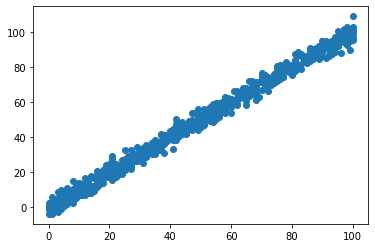

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data
data = pd.read_csv('train.csv')
plt.scatter(data.x, data.y)
plt.show()

In [ ]:
# Loss Function/ Mean squared error function (Minimise this)

def loss_function(m, b, data_points):
    total_error = 0
    # add each individual error and divide by total data points
    for i in range(len(data_points)):
        x = data_points.iloc[i].x
        y = data_points.iloc[i].y
        total_error += (y - (m*x + b))^2
    total_error / float(len(data_points))
    
# Note: we will not use the above loss function
# We are only interested in minimising it and thus using the loss function's derivative
# Above can be used to find the loss manually

Iteration: 0
Iteration: 50
Iteration: 100
Iteration: 150
Iteration: 200
Iteration: 250
0.9988959024017271 0.013271968592368838


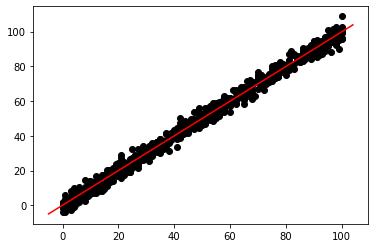

In [11]:
# Gradient Descent (Derivative)

def gradient_descent(m_now, b_now, data_points, L):
    # L = 𝛼 (learning rate)
    # start at 0 as we want the smallest m and b values
    m_gradient = 0
    b_gradient = 0
    
    n = len(data_points)
    
    # Use the partial derivative functions and find the sum over all data points:
    for i in range(n):
        x = data_points.iloc[i].x
        y = data_points.iloc[i].y
   
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

m = 0
b = 0
L = 0.0001
iterations = 300

# Keep iterating in the direction of steepest descent until we find the minimum for m and b
for i in range(iterations):
    if i % 50 == 0:
        print(f"Iteration: {i}")
    m, b = gradient_descent(m, b, data, L)
    
print(m,b)
# plot original data
plt.scatter(data.x, data.y, color="black")
# plot predicted line (x values range from 0,100 in the data set)
plt.plot(list(range(-5, 105)), [m * x + b for x in range(-5, 105)], color="red")
plt.show()

## Sklearn Library

https://www.youtube.com/watch?v=8jazNUpO3lQ

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Training the Model

In [18]:
# Create linear regression object
model = LinearRegression()
# fit the data (train the model)
train = pd.read_csv('train.csv')
# first argument is a 2-D array for all the features (x values). 
# second argument is the y values
model.fit(train[['x']], train.y)

LinearRegression()

In [20]:
# Using the model, predict for a given x (needs to be 2-D)
model.predict([[45]])

C:\Users\samfi\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.92707225])

In [24]:
# Find the gradient m (coefficient of x) and the y-intercept b
m = model.coef_
b = model.intercept_
print(f"m = {m}")
print(f"b = {b}")

print(f"y = mx + b = {m*45 + b}")

m = [1.00057739]
b = -0.09891029338146495
y = mx + b = [44.92707225]


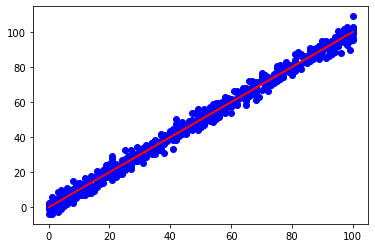

In [28]:
plt.scatter(train.x, train.y, color="blue")
plt.plot(train.x, model.predict(train[['x']]), color="red")
plt.show()

### Test Data

When creating a model, we need to check reliability of it.  
We split the data into:
- **Training data:** to fit the model
- **Test Data:** to test the model

> **Test Size:** Percentage of data points in the test data (e.g. 0.2 or 20%)

In [49]:
from sklearn.model_selection import train_test_split
all_data = pd.read_csv("all_data.csv")

In [50]:
# split the data into training and test
# Random state ensures the split is consistent each time (same data in both groups)
x_train, x_test, y_train, y_test = train_test_split(all_data[['x']], all_data.y, test_size=0.2, random_state=42)

In [51]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## $R^2$
To Test the model, we calculate:
> **$R^2$:** The coefficient of determination. How well the model's predictions match the true values compared to just using the mean.

$$
R^2 = 1 - \frac{Sum\_Squared\_Errors\_(SSE)}{Total\_Sum\_Squares\_(SST)}
$$

$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
$$



Where
$$ 0\le R^2 \le 1$$

$$
\hat{y}_i \; (\text{y-hat}) = \text{the predicted value for point } i \text{ from your model.}
$$  

$$
\bar{y} \; (\text{y-bar}) = \text{the mean of all actual } y \text{ values in the dataset.}
$$

Basically $R^2$ tells you how much better your model is compared to just guessing the average.  
So, the smaller SSE is and the larger SST is, the more reliable the model.  

- $R^2$ = 1: perfect fit
- $R^2$ = 0: model predicts no better than the mean of the y values
- $R^2$ < 0: model is worse than the mean of the y values

So the closer to 1, the more reliable the prediction.  
We use the test data:

In [52]:
# score is the r squared
print(f"R^2 = {model.score(x_test, y_test)}")
print('This is very close to 1 so the model is reliable')

R^2 = 0.9889278781589358
This is very close to 1 so the model is reliable


In [54]:
# Find the RMSE (how far the model's predictions are from the true values)
from sklearn.metrics import mean_squared_error

y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
# Same units as y
# smaller the better

RMSE: 3.0034142769341776


## Multi-Linear Regression

We want to minimise the MSE function while having multiple features (independent variables).  
The Mean Squared Error function (MSE) becomes: 

$$
E = \frac{1}{n} \sum_{i=1}^{n} \Bigg(y_i - \big(b + m_1 x_{i1} + m_2 x_{i2} + \dots + m_p x_{ip}\big)\Bigg)^2
$$

Where: 
- $n$ = number of data points  
- $p$ = number of features  
- $y_i$ = true target for point \(i\)  
- $x_{ij}$ = value of feature \(j\) for point \(i\)  
- $m_j$ = coefficient for feature \(j\)  
- $b$ = intercept


In [55]:
# Multiple features:
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Sudden_Deaths":     [370, 365, 355, 340, 335, 320, 310, 300],
    "Chronic_Illness":   [1500, 1450, 1380, 1290, 1250, 1150, 950, 800],
    "Youth_Deaths":      [340, 330, 325, 310, 300, 280, 230, 200],
    "Counseling_Hours":  [11800, 11500, 11100, 10650, 10300, 9800, 9400, 9000]
}
df = pd.DataFrame(data)
print(df)


   Year  Sudden_Deaths  Chronic_Illness  Youth_Deaths  Counseling_Hours
0  2015            370             1500           340             11800
1  2016            365             1450           330             11500
2  2017            355             1380           325             11100
3  2018            340             1290           310             10650
4  2019            335             1250           300             10300
5  2020            320             1150           280              9800
6  2021            310              950           230              9400
7  2022            300              800           200              9000


In [56]:
X = df[["Sudden_Deaths", "Chronic_Illness", "Youth_Deaths"]]
y = df["Counseling_Hours"]

# Same as before
model = LinearRegression()
model.fit(X, y)

# With big data, we can split into training and test for improved validity of model.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Predictions
y_pred = model.predict(X)

new_data = pd.DataFrame({
    "Sudden_Deaths": [300],
    "Chronic_Illness": [1500],
    "Youth_Deaths": [50]
})

predicted_value = model.predict(new_data)[0]

print('\n Prediction for new data:')
print(new_data)
print(f"Predicted Counselling Hours: {predicted_value:.2f}")


 Prediction for new data:
   Sudden_Deaths  Chronic_Illness  Youth_Deaths
0            300             1500            50
Predicted Counselling Hours: 9818.35


In [57]:
##Reliability:

#R squared (closer to 1, the more reliable):
r_squared = model.score(X,y)
print(f'R squared: {r_squared}')
# Root Mean Squared Error: RMSE (smaller the better-in target units)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

R squared: 0.9971226876688729
RMSE: 50.3092764435689


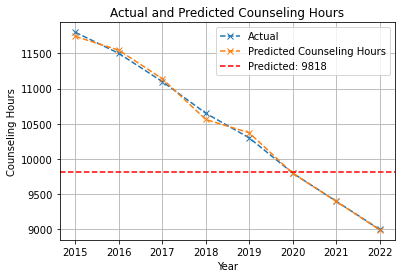

Prediction returns 9818.35 counselling hours


In [58]:
plt.plot(df.Year, df.Counseling_Hours, label="Actual", marker='x', linestyle='--')
plt.plot(df.Year, y_pred, label="Predicted Counseling Hours", marker='x', linestyle='--')
# not linear because we have multiple variables
plt.axhline(y=predicted_value, color='red', linestyle='dashed', label=f"Predicted: {int(predicted_value)}")
plt.xlabel("Year")
plt.ylabel("Counseling Hours")
plt.title("Actual and Predicted Counseling Hours")
plt.legend()
plt.grid(True)
plt.show()

print('Prediction returns 9818.35 counselling hours')